In [1]:
import pandas as pd
import time
df = pd.read_csv("/Users/divy/Desktop/Divy/Image Clasification(Biswa)/Startly/csvs/random_data.csv")
# df.columns = ['v1', 'v2', 'v3', 'v4', 'material']

In [2]:
df

,file_path,block1_conv1,block2_conv1,block3_conv1,block4_conv1,block5_conv1,block5_pool,average5,average6
0,feature_vectors/Moody_Hip_Coffee/photo-1560026...,0,-1,-1,0,0,-1,0,0
1,feature_vectors/Moody_Hip_Coffee/pexels-photo-...,-3,0,0,2,0,0,2,2
2,feature_vectors/Moody_Hip_Coffee/photo-1519174...,-2,-1,2,-1,3,1,4,0
3,feature_vectors/Moody_Hip_Coffee/photo-1512841...,1,0,0,0,2,-1,1,1
4,feature_vectors/Moody_Hip_Coffee/photo-1593443...,0,0,1,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...
1199,feature_vectors/Beige_Soft_Lifestyle/photo-156...,0,1,0,0,1,-1,0,0
1200,feature_vectors/Beige_Soft_Lifestyle/photo-155...,0,-1,-2,-4,-1,1,2,1
1201,feature_vectors/Beige_Soft_Lifestyle/photo-159...,-3,0,0,-1,0,0,3,1
1202,feature_vectors/Beige_Soft_Lifestyle/photo-158...,-1,-2,3,0,0,0,3,1


In [3]:
import numpy as np
X = [np.load(e[0]) for e in df.iloc[:,:1].values]

In [4]:
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1',
                'block5_pool',
                'average5',
                'average6']

In [5]:
ys = {}
i=0
while i<len(style_layers):
    ys[style_layers[i]] = {}
    ys[style_layers[i]] = df.iloc[:,i+1].values
    i += 1

In [6]:
# models = {}

In [7]:
model = {}
# train_mse = {}
# test_mse = {}
# train_mse = {}

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model["SGD"] = {}
for s in ys.keys():
    X_train, X_test, y_train, y_test = train_test_split(X, ys[s], test_size = 0.2, random_state = 0)
    regressor = SGDRegressor()
    start = time.time()
    regressor.fit(X_train, y_train)
    train_time = time.time() - start
    model["SGD"][s] = {}
    start = time.time()
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    pred_time = time.time() - start
    model["SGD"][s]["time_train"] = train_time
    model["SGD"][s]["pred_train"] = pred_time
    test_mse = mean_squared_error(y_test,y_pred)
    train_mse = mean_squared_error(y_train,y_train_pred)
    model["SGD"][s]["train_mse"] = train_mse
    model["SGD"][s]["test_mse"] = test_mse
    model["SGD"][s]["y_pred"] = y_pred
    model["SGD"][s]["y_train_pred"] = y_train_pred
    model["SGD"][s]["model"] = regressor

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler as ss
model["SVM"] = {}
for s in ys.keys():
    X_train, X_test, y_train, y_test = train_test_split(X, ys[s], test_size = 0.2, random_state = 0)
    sc = ss()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    regressor = SVR()
    start = time.time()
    regressor.fit(X_train, y_train)
    train_time = time.time() - start
    model["SVM"][s] = {}
    start = time.time()
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    pred_time = time.time() - start
    model["SVM"][s]["time_train"] = train_time
    model["SVM"][s]["pred_train"] = pred_time
    test_mse = mean_squared_error(y_test,y_pred)
    train_mse = mean_squared_error(y_train,y_train_pred)
    model["SVM"][s]["train_mse"] = train_mse
    model["SVM"][s]["test_mse"] = test_mse
    model["SVM"][s]["y_pred"] = y_pred
    model["SVM"][s]["y_train_pred"] = y_train_pred
    model["SVM"][s]["model"] = regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler as ss
model["DecisionTree"] = {}
for s in ys.keys():
    X_train, X_test, y_train, y_test = train_test_split(X, ys[s], test_size = 0.2, random_state = 0)
    regressor = DecisionTreeRegressor()
    start = time.time()
    regressor.fit(X_train, y_train)
    train_time = time.time() - start
    model["DecisionTree"][s] = {}
    start = time.time()
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    pred_time = time.time() - start
    model["DecisionTree"][s]["time_train"] = train_time
    model["DecisionTree"][s]["pred_train"] = pred_time
    test_mse = mean_squared_error(y_test,y_pred)
    train_mse = mean_squared_error(y_train,y_train_pred)
    model["DecisionTree"][s]["train_mse"] = train_mse
    model["DecisionTree"][s]["test_mse"] = test_mse
    model["DecisionTree"][s]["y_pred"] = y_pred
    model["DecisionTree"][s]["y_train_pred"] = y_train_pred
    model["DecisionTree"][s]["model"] = regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler as ss
model["RandomForest"] = {}
for s in ys.keys():
    X_train, X_test, y_train, y_test = train_test_split(X, ys[s], test_size = 0.2, random_state = 0)
    regressor = RandomForestRegressor()
    start = time.time()
    regressor.fit(X_train, y_train)
    train_time = time.time() - start
    model["RandomForest"][s] = {}
    start = time.time()
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    pred_time = time.time() - start
    model["RandomForest"][s]["time_train"] = train_time
    model["RandomForest"][s]["pred_train"] = pred_time
    test_mse = mean_squared_error(y_test,y_pred)
    train_mse = mean_squared_error(y_train,y_train_pred)
    model["RandomForest"][s]["train_mse"] = train_mse
    model["RandomForest"][s]["test_mse"] = test_mse
    model["RandomForest"][s]["y_pred"] = y_pred
    model["RandomForest"][s]["y_train_pred"] = y_train_pred
    model["RandomForest"][s]["model"] = regressor

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler as ss
model["XGBoost"] = {}
for s in ys.keys():
    X_train, X_test, y_train, y_test = train_test_split(X, ys[s], test_size = 0.2, random_state = 0)
    regressor = XGBRegressor()
    start = time.time()
    regressor.fit(X_train, y_train)
    train_time = time.time() - start
    model["XGBoost"][s] = {}
    start = time.time()
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    pred_time = time.time() - start
    model["XGBoost"][s]["time_train"] = train_time
    model["XGBoost"][s]["pred_train"] = pred_time
    test_mse = mean_squared_error(y_test,y_pred)
    train_mse = mean_squared_error(y_train,y_train_pred)
    model["XGBoost"][s]["train_mse"] = train_mse
    model["XGBoost"][s]["test_mse"] = test_mse
    model["XGBoost"][s]["y_pred"] = y_pred
    model["XGBoost"][s]["y_train_pred"] = y_train_pred
    model["XGBoost"][s]["model"] = regressor

In [13]:
csv = ["model"]
csv += style_layers
csv = f'{",".join(csv)}\n'

for m in model.keys():
    l = []
    l.append(m)
    for s in model[m].keys():
        l.append(f'{model[m][s]["test_mse"]}')
    csv += f'{",".join(l)}\n'

In [14]:
print(csv)

model,block1_conv1,block2_conv1,block3_conv1,block4_conv1,block5_conv1,block5_pool,average5,average6
SGD,1.9189293484010075,1.4502815484873492,1.7826499102056574,1.2629491167028444,1.8467380402804783,1.7587897750388215,1.5891128916758583,1.6088786652893088
SVM,2.0191645790288204,1.5107872278122467,1.8997898086920273,1.2871827609910662,1.8952210051893026,1.8175349438224584,1.6294892901518068,1.6893933600136852
DecisionTree,3.319502074688797,3.3443983402489628,3.9367219917012446,3.0840248962655603,3.671161825726141,3.6151452282157677,3.4460580912863072,4.063278008298755
RandomForest,1.9806618012909174,1.5722771822527075,1.8525982400875978,1.3521001295527895,1.8794122445380639,1.8211743101659752,1.6297403650370244,1.7975332128861228
XGBoost,2.2989376158483696,1.9410686269882296,2.03111075156135,1.6096992720559236,2.1617829570049496,2.138020914217445,1.861026410243963,2.0699036547881193



In [15]:
file = open("/Users/divy/Desktop/Divy/Image Clasification(Biswa)/results.csv", mode="x")
file.write(csv)
file.close()

In [27]:
model["XGBoost"][s]["time_train"]

10.35409688949585

In [28]:
model["RandomForest"][s]["time_train"]

29.37543296813965

In [16]:
from sklearn.metrics import accuracy_score
y = [np.argmax(e) for e in df.iloc[:,1:].values]
for m in model.keys():
    if m == "SVM":
        X_ = sc.transform(X)
    else:
        X_ = X
    y_pred = []
    for s in model[m].keys():
        model_ = model[m][s]['model']
        y_pred_ = model_.predict(X_)
        y_pred.append(y_pred_)
    y_pred = np.asarray(y_pred)
    y_pred = y_pred.reshape(y_pred.shape[1],y_pred.shape[0])
    y_pred = [np.argmax(e) for e in y_pred]
    print(f"{m} : {accuracy_score(y, y_pred)*100:.3f}%")

SGD : 12.542%
SVM : 12.625%
DecisionTree : 15.781%
RandomForest : 13.621%
XGBoost : 14.120%


In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler
n_class = 8
x_train, x_test, y_train, y_test = train_test_split(X, df.iloc[:,1:].values, test_size = 0.2, random_state = 0)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
# shape = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
inp = tf.keras.Input(shape=(x_train.shape[1],))
x = layers.Dense(15, activation="relu")(inp)
x = layers.Dropout(0.4)(x)
output = layers.Dense(n_class, activation="softmax")(x)

model = tf.keras.Model(inp, output)
optimizer = tf.keras.optimizers.RMSprop(lr=1e-3)
model.compile(optimizer, "categorical_crossentropy", metrics=["accuracy"])

/opt/homebrew/Caskroom/miniforge/base/envs/py/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
    import math
    batch_size, epochs, verbose = 20, 1000, 1
    initial_learning_rate = 1e-3
    def lr_exp_decay(epoch, lr):
        k = 1e-5
        return initial_learning_rate * math.exp(-k * epoch)

    model.fit(x_train, np.asarray(y_train), batch_size, epochs, callbacks=[LearningRateScheduler(lr_exp_decay)],
              verbose=verbose, validation_data=(x_test, np.asarray(y_test)))

Epoch 1/1000
 1/49 [..............................] - ETA: 7s - loss: -1.0582 - accuracy: 0.1500

2021-10-22 00:04:48.526932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-22 00:04:48.527370: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


49/49 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.1381 - val_loss: 0.3636 - val_accuracy: 0.1494
Epoch 2/1000
49/49 [==============================] - 0s 552us/step - loss: 0.0804 - accuracy: 0.1506 - val_loss: 0.3636 - val_accuracy: 0.1660
Epoch 3/1000
49/49 [==============================] - 0s 551us/step - loss: 0.0707 - accuracy: 0.1641 - val_loss: 0.3620 - val_accuracy: 0.1577
Epoch 4/1000
49/49 [==============================] - 0s 568us/step - loss: 0.0707 - accuracy: 0.1443 - val_loss: 0.3622 - val_accuracy: 0.1701
Epoch 5/1000
49/49 [==============================] - 0s 562us/step - loss: 0.0499 - accuracy: 0.1672 - val_loss: 0.3594 - val_accuracy: 0.1867
Epoch 6/1000
49/49 [==============================] - 0s 532us/step - loss: 0.0270 - accuracy: 0.1630 - val_loss: 0.3570 - val_accuracy: 0.1909
Epoch 7/1000
49/49 [==============================] - 0s 532us/step - loss: 0.0222 - accuracy: 0.1724 - val_loss: 0.3562 - val_accuracy: 0.1909
Epoch 8

49/49 [==============================] - 0s 597us/step - loss: -0.7407 - accuracy: 0.1381 - val_loss: 0.2524 - val_accuracy: 0.1328
Epoch 58/1000
49/49 [==============================] - 0s 617us/step - loss: -0.6595 - accuracy: 0.1475 - val_loss: 0.2509 - val_accuracy: 0.1328
Epoch 59/1000
49/49 [==============================] - 0s 598us/step - loss: -0.5743 - accuracy: 0.1443 - val_loss: 0.2534 - val_accuracy: 0.1203
Epoch 60/1000
49/49 [==============================] - 0s 595us/step - loss: -0.5606 - accuracy: 0.1506 - val_loss: 0.2487 - val_accuracy: 0.1037
Epoch 61/1000
49/49 [==============================] - 0s 604us/step - loss: -0.8952 - accuracy: 0.1495 - val_loss: 0.2462 - val_accuracy: 0.0996
Epoch 62/1000
49/49 [==============================] - 0s 586us/step - loss: -0.8849 - accuracy: 0.1610 - val_loss: 0.2398 - val_accuracy: 0.1079
Epoch 63/1000
49/49 [==============================] - 0s 589us/step - loss: -0.6016 - accuracy: 0.1423 - val_loss: 0.2383 - val_accuracy:

Epoch 113/1000
49/49 [==============================] - 0s 617us/step - loss: -1.3633 - accuracy: 0.1340 - val_loss: 0.1816 - val_accuracy: 0.0996
Epoch 114/1000
49/49 [==============================] - 0s 620us/step - loss: -0.9325 - accuracy: 0.1194 - val_loss: 0.1767 - val_accuracy: 0.1079
Epoch 115/1000
49/49 [==============================] - 0s 565us/step - loss: -0.9754 - accuracy: 0.1371 - val_loss: 0.1735 - val_accuracy: 0.1037
Epoch 116/1000
49/49 [==============================] - 0s 558us/step - loss: -1.0815 - accuracy: 0.1443 - val_loss: 0.1733 - val_accuracy: 0.1079
Epoch 117/1000
49/49 [==============================] - 0s 569us/step - loss: -1.2289 - accuracy: 0.1267 - val_loss: 0.1564 - val_accuracy: 0.0996
Epoch 118/1000
49/49 [==============================] - 0s 562us/step - loss: -1.0449 - accuracy: 0.1329 - val_loss: 0.1568 - val_accuracy: 0.0871
Epoch 119/1000
49/49 [==============================] - 0s 555us/step - loss: -0.8981 - accuracy: 0.1288 - val_loss: 0

49/49 [==============================] - 0s 590us/step - loss: -1.5936 - accuracy: 0.1277 - val_loss: 0.0673 - val_accuracy: 0.1577
Epoch 169/1000
49/49 [==============================] - 0s 611us/step - loss: -1.8139 - accuracy: 0.1225 - val_loss: 0.0604 - val_accuracy: 0.1577
Epoch 170/1000
49/49 [==============================] - 0s 580us/step - loss: -1.5703 - accuracy: 0.1568 - val_loss: 0.0769 - val_accuracy: 0.1452
Epoch 171/1000
49/49 [==============================] - 0s 562us/step - loss: -1.2236 - accuracy: 0.1298 - val_loss: 0.0748 - val_accuracy: 0.1618
Epoch 172/1000
49/49 [==============================] - 0s 555us/step - loss: -1.6823 - accuracy: 0.1267 - val_loss: 0.0781 - val_accuracy: 0.1618
Epoch 173/1000
49/49 [==============================] - 0s 557us/step - loss: -1.2979 - accuracy: 0.1516 - val_loss: 0.0594 - val_accuracy: 0.1577
Epoch 174/1000
49/49 [==============================] - 0s 562us/step - loss: -1.1349 - accuracy: 0.1225 - val_loss: 0.0496 - val_acc

Epoch 224/1000
49/49 [==============================] - 0s 617us/step - loss: -1.8545 - accuracy: 0.1298 - val_loss: 0.0188 - val_accuracy: 0.0913
Epoch 225/1000
49/49 [==============================] - 0s 589us/step - loss: -1.7909 - accuracy: 0.1225 - val_loss: 0.0035 - val_accuracy: 0.0996
Epoch 226/1000
49/49 [==============================] - 0s 564us/step - loss: -1.2705 - accuracy: 0.1391 - val_loss: 0.0324 - val_accuracy: 0.1618
Epoch 227/1000
49/49 [==============================] - 0s 559us/step - loss: -1.9186 - accuracy: 0.1329 - val_loss: 0.0038 - val_accuracy: 0.0954
Epoch 228/1000
49/49 [==============================] - 0s 556us/step - loss: -0.9585 - accuracy: 0.1111 - val_loss: 0.0300 - val_accuracy: 0.1618
Epoch 229/1000
49/49 [==============================] - 0s 556us/step - loss: -0.9773 - accuracy: 0.1371 - val_loss: 0.0239 - val_accuracy: 0.0913
Epoch 230/1000
49/49 [==============================] - 0s 576us/step - loss: -0.8461 - accuracy: 0.1298 - val_loss: -

49/49 [==============================] - 0s 625us/step - loss: -1.9472 - accuracy: 0.1319 - val_loss: 0.0137 - val_accuracy: 0.0830
Epoch 280/1000
49/49 [==============================] - 0s 628us/step - loss: -0.9387 - accuracy: 0.1038 - val_loss: 0.0082 - val_accuracy: 0.0954
Epoch 281/1000
49/49 [==============================] - 0s 599us/step - loss: -0.3276 - accuracy: 0.1049 - val_loss: -0.0199 - val_accuracy: 0.2116
Epoch 282/1000
49/49 [==============================] - 0s 560us/step - loss: -2.2409 - accuracy: 0.1360 - val_loss: -0.0088 - val_accuracy: 0.0996
Epoch 283/1000
49/49 [==============================] - 0s 553us/step - loss: -1.1903 - accuracy: 0.1049 - val_loss: -0.0026 - val_accuracy: 0.0830
Epoch 284/1000
49/49 [==============================] - 0s 558us/step - loss: -0.9129 - accuracy: 0.1371 - val_loss: -0.0545 - val_accuracy: 0.0830
Epoch 285/1000
49/49 [==============================] - 0s 554us/step - loss: -1.5688 - accuracy: 0.1163 - val_loss: -0.0504 - va

49/49 [==============================] - 0s 603us/step - loss: -1.5442 - accuracy: 0.1215 - val_loss: -1.0272e-04 - val_accuracy: 0.1618
Epoch 335/1000
49/49 [==============================] - 0s 606us/step - loss: -1.0411 - accuracy: 0.1464 - val_loss: 0.0095 - val_accuracy: 0.0830
Epoch 336/1000
49/49 [==============================] - 0s 590us/step - loss: -1.0565 - accuracy: 0.1163 - val_loss: 0.0330 - val_accuracy: 0.0996
Epoch 337/1000
49/49 [==============================] - 0s 557us/step - loss: -0.8298 - accuracy: 0.1225 - val_loss: -0.0252 - val_accuracy: 0.1037
Epoch 338/1000
49/49 [==============================] - 0s 563us/step - loss: -0.7035 - accuracy: 0.1319 - val_loss: -0.0478 - val_accuracy: 0.2116
Epoch 339/1000
49/49 [==============================] - 0s 558us/step - loss: -1.3896 - accuracy: 0.1225 - val_loss: 0.0482 - val_accuracy: 0.0830
Epoch 340/1000
49/49 [==============================] - 0s 563us/step - loss: -1.1965 - accuracy: 0.1340 - val_loss: 0.0080 - 

Epoch 390/1000
49/49 [==============================] - 0s 585us/step - loss: -0.7178 - accuracy: 0.1443 - val_loss: 0.0257 - val_accuracy: 0.2116
Epoch 391/1000
49/49 [==============================] - 0s 584us/step - loss: -0.5378 - accuracy: 0.1340 - val_loss: 0.0895 - val_accuracy: 0.1162
Epoch 392/1000
49/49 [==============================] - 0s 571us/step - loss: -0.4873 - accuracy: 0.1163 - val_loss: 0.0638 - val_accuracy: 0.1245
Epoch 393/1000
49/49 [==============================] - 0s 566us/step - loss: -1.0441 - accuracy: 0.1184 - val_loss: 0.0736 - val_accuracy: 0.1618
Epoch 394/1000
49/49 [==============================] - 0s 577us/step - loss: -0.4602 - accuracy: 0.1360 - val_loss: 0.0903 - val_accuracy: 0.2116
Epoch 395/1000
49/49 [==============================] - 0s 555us/step - loss: -0.4975 - accuracy: 0.1329 - val_loss: 0.1665 - val_accuracy: 0.0830
Epoch 396/1000
49/49 [==============================] - 0s 558us/step - loss: -0.5867 - accuracy: 0.1277 - val_loss: 0

Epoch 446/1000
49/49 [==============================] - 0s 611us/step - loss: -0.4160 - accuracy: 0.1340 - val_loss: 0.1872 - val_accuracy: 0.2116
Epoch 447/1000
49/49 [==============================] - 0s 580us/step - loss: -0.4082 - accuracy: 0.1506 - val_loss: 0.2143 - val_accuracy: 0.0996
Epoch 448/1000
49/49 [==============================] - 0s 562us/step - loss: -0.3220 - accuracy: 0.1298 - val_loss: 0.2576 - val_accuracy: 0.0830
Epoch 449/1000
49/49 [==============================] - 0s 562us/step - loss: -0.2439 - accuracy: 0.1246 - val_loss: 0.2154 - val_accuracy: 0.0830
Epoch 450/1000
49/49 [==============================] - 0s 565us/step - loss: -0.2911 - accuracy: 0.1256 - val_loss: 0.1740 - val_accuracy: 0.1618
Epoch 451/1000
49/49 [==============================] - 0s 564us/step - loss: -0.3079 - accuracy: 0.1547 - val_loss: 0.2334 - val_accuracy: 0.1411
Epoch 452/1000
49/49 [==============================] - 0s 560us/step - loss: -0.2347 - accuracy: 0.1267 - val_loss: 0

49/49 [==============================] - 0s 595us/step - loss: -0.1463 - accuracy: 0.1319 - val_loss: 0.2051 - val_accuracy: 0.0830
Epoch 502/1000
49/49 [==============================] - 0s 594us/step - loss: -0.0425 - accuracy: 0.1371 - val_loss: 0.2462 - val_accuracy: 0.0830
Epoch 503/1000
49/49 [==============================] - 0s 580us/step - loss: 0.0448 - accuracy: 0.1205 - val_loss: 0.2266 - val_accuracy: 0.0913
Epoch 504/1000
49/49 [==============================] - 0s 578us/step - loss: -0.1706 - accuracy: 0.0976 - val_loss: 0.2556 - val_accuracy: 0.1867
Epoch 505/1000
49/49 [==============================] - 0s 568us/step - loss: -0.1133 - accuracy: 0.1153 - val_loss: 0.2300 - val_accuracy: 0.0996
Epoch 506/1000
49/49 [==============================] - 0s 594us/step - loss: -0.1068 - accuracy: 0.1070 - val_loss: 0.3514 - val_accuracy: 0.0830
Epoch 507/1000
49/49 [==============================] - 0s 562us/step - loss: -0.1279 - accuracy: 0.1225 - val_loss: 0.2653 - val_accu

49/49 [==============================] - 0s 714us/step - loss: -0.1040 - accuracy: 0.1173 - val_loss: 0.3792 - val_accuracy: 0.0996
Epoch 557/1000
49/49 [==============================] - 0s 702us/step - loss: -0.0338 - accuracy: 0.1215 - val_loss: 0.2491 - val_accuracy: 0.0996
Epoch 558/1000
49/49 [==============================] - 0s 672us/step - loss: 0.0426 - accuracy: 0.0987 - val_loss: 0.1811 - val_accuracy: 0.2116
Epoch 559/1000
49/49 [==============================] - 0s 691us/step - loss: -0.1235 - accuracy: 0.1454 - val_loss: 0.2758 - val_accuracy: 0.0996
Epoch 560/1000
49/49 [==============================] - 0s 687us/step - loss: 0.0631 - accuracy: 0.1163 - val_loss: 0.2702 - val_accuracy: 0.0996
Epoch 561/1000
49/49 [==============================] - 0s 689us/step - loss: -0.0756 - accuracy: 0.1184 - val_loss: 0.2512 - val_accuracy: 0.0871
Epoch 562/1000
49/49 [==============================] - 0s 672us/step - loss: -0.1246 - accuracy: 0.1350 - val_loss: 0.3001 - val_accur

Epoch 612/1000
49/49 [==============================] - 0s 678us/step - loss: -0.0419 - accuracy: 0.1319 - val_loss: 0.3179 - val_accuracy: 0.0996
Epoch 613/1000
49/49 [==============================] - 0s 619us/step - loss: -0.0449 - accuracy: 0.1329 - val_loss: 0.2680 - val_accuracy: 0.0996
Epoch 614/1000
49/49 [==============================] - 0s 666us/step - loss: -0.1776 - accuracy: 0.1371 - val_loss: 0.2507 - val_accuracy: 0.1618
Epoch 615/1000
49/49 [==============================] - 0s 617us/step - loss: -0.1791 - accuracy: 0.1526 - val_loss: 0.3142 - val_accuracy: 0.0996
Epoch 616/1000
49/49 [==============================] - 0s 592us/step - loss: -0.0779 - accuracy: 0.1153 - val_loss: 0.3095 - val_accuracy: 0.0830
Epoch 617/1000
49/49 [==============================] - 0s 601us/step - loss: -0.2815 - accuracy: 0.1319 - val_loss: 0.3827 - val_accuracy: 0.0913
Epoch 618/1000
49/49 [==============================] - 0s 581us/step - loss: -0.2118 - accuracy: 0.1288 - val_loss: 0

Epoch 668/1000
49/49 [==============================] - 0s 649us/step - loss: 0.0289 - accuracy: 0.1267 - val_loss: 0.2907 - val_accuracy: 0.1618
Epoch 669/1000
49/49 [==============================] - 0s 652us/step - loss: -7.5745e-04 - accuracy: 0.1132 - val_loss: 0.3046 - val_accuracy: 0.1618
Epoch 670/1000
49/49 [==============================] - 0s 663us/step - loss: -0.0415 - accuracy: 0.1475 - val_loss: 0.2310 - val_accuracy: 0.0954
Epoch 671/1000
49/49 [==============================] - 0s 654us/step - loss: -0.0312 - accuracy: 0.1506 - val_loss: 0.3793 - val_accuracy: 0.0996
Epoch 672/1000
49/49 [==============================] - 0s 625us/step - loss: -0.1774 - accuracy: 0.1319 - val_loss: 0.2916 - val_accuracy: 0.0830
Epoch 673/1000
49/49 [==============================] - 0s 630us/step - loss: -0.0332 - accuracy: 0.1194 - val_loss: 0.2115 - val_accuracy: 0.1037
Epoch 674/1000
49/49 [==============================] - 0s 621us/step - loss: 0.1107 - accuracy: 0.1277 - val_loss:

Epoch 724/1000
49/49 [==============================] - 0s 576us/step - loss: 0.0518 - accuracy: 0.1319 - val_loss: 0.2393 - val_accuracy: 0.2116
Epoch 725/1000
49/49 [==============================] - 0s 569us/step - loss: 0.0592 - accuracy: 0.1526 - val_loss: 0.2854 - val_accuracy: 0.2116
Epoch 726/1000
49/49 [==============================] - 0s 570us/step - loss: 0.0651 - accuracy: 0.1329 - val_loss: 0.4307 - val_accuracy: 0.0581
Epoch 727/1000
49/49 [==============================] - 0s 604us/step - loss: -0.0136 - accuracy: 0.1267 - val_loss: 0.2830 - val_accuracy: 0.0830
Epoch 728/1000
49/49 [==============================] - 0s 780us/step - loss: 0.0988 - accuracy: 0.1381 - val_loss: 0.2398 - val_accuracy: 0.0830
Epoch 729/1000
49/49 [==============================] - 0s 673us/step - loss: -0.0762 - accuracy: 0.1236 - val_loss: 0.3606 - val_accuracy: 0.2116
Epoch 730/1000
49/49 [==============================] - 0s 660us/step - loss: 0.1460 - accuracy: 0.1142 - val_loss: 0.2582

Epoch 780/1000
49/49 [==============================] - 0s 659us/step - loss: -0.0658 - accuracy: 0.1101 - val_loss: 0.2732 - val_accuracy: 0.0996
Epoch 781/1000
49/49 [==============================] - 0s 631us/step - loss: -0.1956 - accuracy: 0.1194 - val_loss: 0.2987 - val_accuracy: 0.2116
Epoch 782/1000
49/49 [==============================] - 0s 628us/step - loss: -0.1336 - accuracy: 0.1194 - val_loss: 0.2350 - val_accuracy: 0.1618
Epoch 783/1000
49/49 [==============================] - 0s 622us/step - loss: 0.0638 - accuracy: 0.1205 - val_loss: 0.2517 - val_accuracy: 0.2116
Epoch 784/1000
49/49 [==============================] - 0s 668us/step - loss: -0.0728 - accuracy: 0.1391 - val_loss: 0.2342 - val_accuracy: 0.0954
Epoch 785/1000
49/49 [==============================] - 0s 670us/step - loss: 0.0234 - accuracy: 0.1142 - val_loss: 0.3558 - val_accuracy: 0.0830
Epoch 786/1000
49/49 [==============================] - 0s 703us/step - loss: 0.0066 - accuracy: 0.1464 - val_loss: 0.33

Epoch 836/1000
49/49 [==============================] - 0s 631us/step - loss: -0.1392 - accuracy: 0.1360 - val_loss: 0.2585 - val_accuracy: 0.1701
Epoch 837/1000
49/49 [==============================] - 0s 642us/step - loss: -0.0495 - accuracy: 0.1506 - val_loss: 0.3348 - val_accuracy: 0.2116
Epoch 838/1000
49/49 [==============================] - 0s 633us/step - loss: -0.0099 - accuracy: 0.1308 - val_loss: 0.3096 - val_accuracy: 0.1867
Epoch 839/1000
49/49 [==============================] - 0s 625us/step - loss: 0.1516 - accuracy: 0.1142 - val_loss: 0.3155 - val_accuracy: 0.0830
Epoch 840/1000
49/49 [==============================] - 0s 648us/step - loss: -0.0614 - accuracy: 0.1142 - val_loss: 0.3597 - val_accuracy: 0.0830
Epoch 841/1000
49/49 [==============================] - 0s 626us/step - loss: 0.0257 - accuracy: 0.1215 - val_loss: 0.3380 - val_accuracy: 0.0996
Epoch 842/1000
49/49 [==============================] - 0s 646us/step - loss: -0.0798 - accuracy: 0.1308 - val_loss: 0.3

Epoch 892/1000
49/49 [==============================] - 0s 616us/step - loss: -0.0725 - accuracy: 0.1225 - val_loss: 0.3533 - val_accuracy: 0.2116
Epoch 893/1000
49/49 [==============================] - 0s 595us/step - loss: 0.0136 - accuracy: 0.1412 - val_loss: 0.3368 - val_accuracy: 0.0830
Epoch 894/1000
49/49 [==============================] - 0s 628us/step - loss: 0.1463 - accuracy: 0.1184 - val_loss: 0.6507 - val_accuracy: 0.0830
Epoch 895/1000
49/49 [==============================] - 0s 628us/step - loss: -0.0515 - accuracy: 0.1423 - val_loss: 0.3048 - val_accuracy: 0.2116
Epoch 896/1000
49/49 [==============================] - 0s 628us/step - loss: -0.1142 - accuracy: 0.1402 - val_loss: 0.4986 - val_accuracy: 0.0830
Epoch 897/1000
49/49 [==============================] - 0s 628us/step - loss: 0.0040 - accuracy: 0.1319 - val_loss: 0.3328 - val_accuracy: 0.0830
Epoch 898/1000
49/49 [==============================] - 0s 630us/step - loss: -0.1800 - accuracy: 0.1381 - val_loss: 0.31

Epoch 948/1000
49/49 [==============================] - 0s 746us/step - loss: -0.2957 - accuracy: 0.1288 - val_loss: 0.2882 - val_accuracy: 0.0830
Epoch 949/1000
49/49 [==============================] - 0s 704us/step - loss: -0.2228 - accuracy: 0.1610 - val_loss: 0.1938 - val_accuracy: 0.0996
Epoch 950/1000
49/49 [==============================] - 0s 683us/step - loss: -0.2980 - accuracy: 0.1412 - val_loss: 0.3414 - val_accuracy: 0.1535
Epoch 951/1000
49/49 [==============================] - 0s 679us/step - loss: -0.0102 - accuracy: 0.1360 - val_loss: 0.2944 - val_accuracy: 0.0996
Epoch 952/1000
49/49 [==============================] - 0s 688us/step - loss: -0.2661 - accuracy: 0.1308 - val_loss: 0.2160 - val_accuracy: 0.1867
Epoch 953/1000
49/49 [==============================] - 0s 740us/step - loss: -0.0648 - accuracy: 0.1329 - val_loss: 0.3303 - val_accuracy: 0.2116
Epoch 954/1000
49/49 [==============================] - 0s 680us/step - loss: -0.0937 - accuracy: 0.1381 - val_loss: 0

In [130]:
import numpy as np
y = [np.argmax(e) for e in df.iloc[:,1:].values]
mean, sd = 0, 5

In [136]:
s = np.random.normal(mean, sd, size=(8))

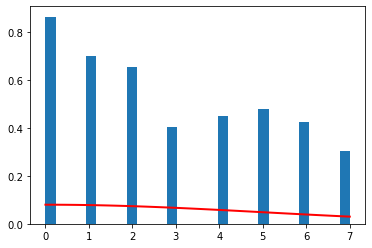

In [131]:
import matplotlib.pyplot as plt
# s_ = s
# s = s.reshape(-1)
count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mean)**2 / (2 * sd**2) ),
          linewidth=2, color='r')
plt.show()

In [138]:
s

array([-11.01779623,  -7.42060175,  -1.87723245,   3.25221745,
        -1.41576837,   4.436209  ,  -4.02275903,  -3.62050556])

In [29]:
s.reshape(-1).shape

(8,)

In [104]:
plt.hist(y)

NameError: name 'plt' is not defined

In [123]:
# generate random Gaussian values
from random import seed
from random import gauss
# seed random number generator
# seed(0)
# generate some Gaussian values
for _ in range(10):
    value = int(gauss(0, 5/2))
    if value > 5:
        value = 5
    elif value < -5:
        value = -5
    print(value)

0
0
5
4
0
2
0
-4
1
0
